In [2]:
# Cell 1: Import all required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Cell 2: Load dataset and basic overview
df = pd.read_csv("household_data_15min_singleindex.csv")
print("Initial shape:", df.shape)
display(df.head())
display(df.info())


Initial shape: (153810, 71)


,utc_timestamp,cet_cest_timestamp,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,...,DE_KN_residential5_refrigerator,DE_KN_residential5_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine,interpolated
0,2014-12-11T17:45:00Z,2014-12-11T18:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11T18:15:00Z,2014-12-11T19:15:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11T18:30:00Z,2014-12-11T19:30:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11T18:45:00Z,2014-12-11T19:45:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   utc_timestamp                        153810 non-null  object 
 1   cet_cest_timestamp                   153810 non-null  object 
 2   DE_KN_industrial1_grid_import        65730 non-null   float64
 3   DE_KN_industrial1_pv_1               69151 non-null   float64
 4   DE_KN_industrial1_pv_2               69151 non-null   float64
 5   DE_KN_industrial2_grid_import        45113 non-null   float64
 6   DE_KN_industrial2_pv                 47998 non-null   float64
 7   DE_KN_industrial2_storage_charge     39010 non-null   float64
 8   DE_KN_industrial2_storage_decharge   39010 non-null   float64
 9   DE_KN_industrial3_area_offices       57437 non-null   float64
 10  DE_KN_industrial3_area_room_1        57437 non-null   float64
 11  DE_KN_industr

None

In [4]:
# Cell 3: Handle duplicates
duplicate_count = df.duplicated().sum()
print(f"Duplicate rows found: {duplicate_count}")

if duplicate_count > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape:", df.shape)


Duplicate rows found: 0


In [5]:
# Cell 4: Missing value analysis
missing_report = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n")
display(missing_report)

# Drop columns with >50% missing data
threshold = len(df) * 0.5
cols_to_drop = [col for col in df.columns if df[col].isnull().sum() > threshold]

if cols_to_drop:
    print("\nDropping columns with >50% missing data:", cols_to_drop)
    df.drop(columns=cols_to_drop, inplace=True)
else:
    print("\nNo columns dropped (all under threshold).")

# Fill remaining missing values using forward fill (time series safe)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)

print("\nMissing value handling complete.")


Missing values per column:



DE_KN_public2_grid_import              149319
DE_KN_public1_grid_import              135613
DE_KN_industrial2_storage_charge       114800
DE_KN_industrial2_storage_decharge     114800
DE_KN_residential2_freezer             112810
                                        ...  
DE_KN_residential3_washing_machine      31629
DE_KN_residential5_grid_import          30599
DE_KN_residential3_circulation_pump     20971
utc_timestamp                               0
cet_cest_timestamp                          0
Length: 71, dtype: int64


Dropping columns with >50% missing data: ['DE_KN_industrial1_grid_import', 'DE_KN_industrial1_pv_1', 'DE_KN_industrial1_pv_2', 'DE_KN_industrial2_grid_import', 'DE_KN_industrial2_pv', 'DE_KN_industrial2_storage_charge', 'DE_KN_industrial2_storage_decharge', 'DE_KN_industrial3_area_offices', 'DE_KN_industrial3_area_room_1', 'DE_KN_industrial3_area_room_2', 'DE_KN_industrial3_area_room_3', 'DE_KN_industrial3_area_room_4', 'DE_KN_industrial3_compressor', 'DE_KN_industrial3_cooling_aggregate', 'DE_KN_industrial3_cooling_pumps', 'DE_KN_industrial3_dishwasher', 'DE_KN_industrial3_ev', 'DE_KN_industrial3_grid_import', 'DE_KN_industrial3_machine_1', 'DE_KN_industrial3_machine_2', 'DE_KN_industrial3_machine_3', 'DE_KN_industrial3_machine_4', 'DE_KN_industrial3_machine_5', 'DE_KN_industrial3_pv_facade', 'DE_KN_industrial3_pv_roof', 'DE_KN_industrial3_refrigerator', 'DE_KN_industrial3_ventilation', 'DE_KN_public1_grid_import', 'DE_KN_public2_grid_import', 'DE_KN_residential1_dishwasher', 'DE_KN_

C:\Users\diyab\AppData\Local\Temp\ipykernel_15156\2525141757.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\diyab\AppData\Local\Temp\ipykernel_15156\2525141757.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [6]:
# Cell 5: Handle negative values
neg_cols = []
for col in df.select_dtypes(include=np.number).columns:
    if (df[col] < 0).any():
        neg_cols.append(col)
        neg_count = (df[col] < 0).sum()
        print(f"Column '{col}' has {neg_count} negative values.")
        # Only remove negatives for columns that shouldn't be negative (e.g., power/energy)
        df = df[df[col] >= 0]

if neg_cols:
    print("\nColumns with negatives handled:", neg_cols)
else:
    print("\nNo negative values detected in numeric columns.")



No negative values detected in numeric columns.


In [7]:
# Cell 6: Handle timestamp parsing if applicable
possible_time_cols = [c for c in df.columns if 'time' in c.lower() or 'date' in c.lower()]

if possible_time_cols:
    print("Possible timestamp columns found:", possible_time_cols)
    time_col = possible_time_cols[0]  # take first one if multiple
    df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
    df.sort_values(time_col, inplace=True)
    df.set_index(time_col, inplace=True)
    print(f"Timestamp column '{time_col}' set as index.")
else:
    print("No timestamp column detected — data may already be indexed by time.")


Possible timestamp columns found: ['utc_timestamp', 'cet_cest_timestamp']
Timestamp column 'utc_timestamp' set as index.


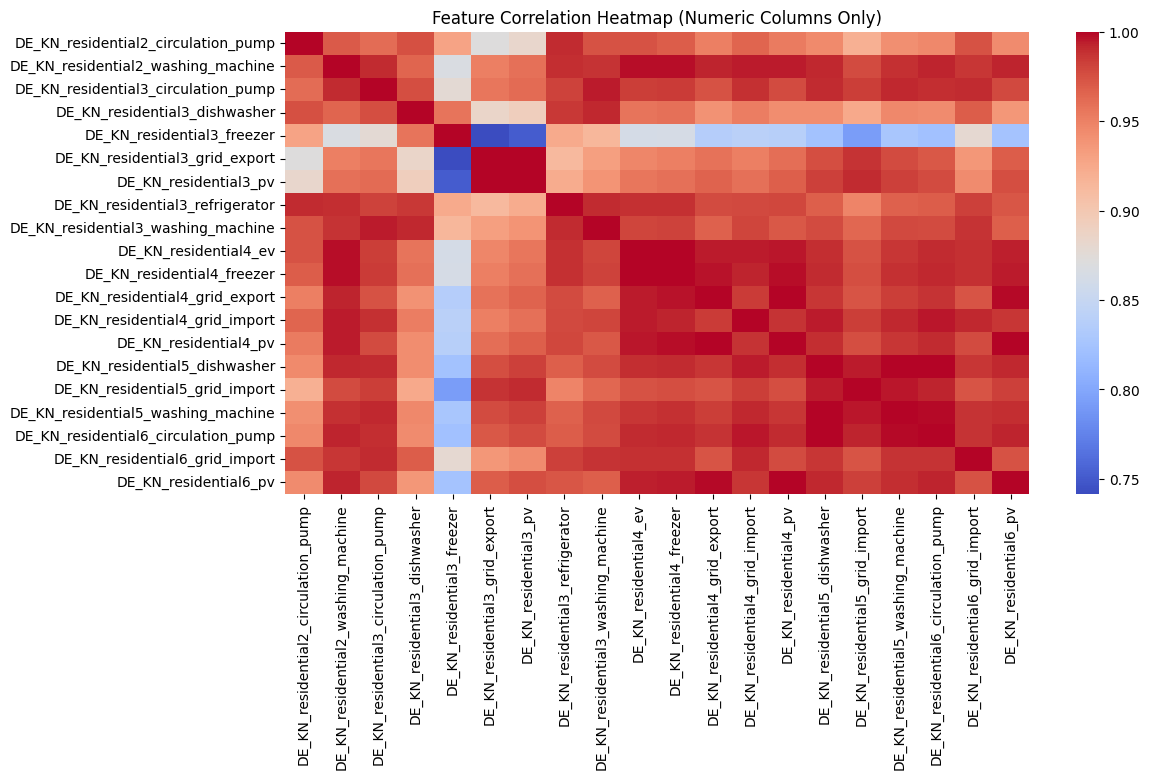

No constant columns found.


In [9]:
#Correlation heatmap (numeric columns only)
num_df = df.select_dtypes(include=[np.number])

if num_df.shape[1] > 1:
    plt.figure(figsize=(12, 6))
    sns.heatmap(num_df.corr(), cmap="coolwarm", annot=False)
    plt.title("Feature Correlation Heatmap (Numeric Columns Only)")
    plt.show()
else:
    print("Not enough numeric columns for correlation heatmap.")

# Drop constant or single-value columns (no variance)
nunique = df.nunique()
constant_cols = [col for col in df.columns if nunique[col] <= 1]

if constant_cols:
    print("Dropping constant columns:", constant_cols)
    df.drop(columns=constant_cols, inplace=True)
else:
    print("No constant columns found.")


In [10]:
# Cell 8: Normalization
num_cols = df.select_dtypes(include=np.number).columns
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Normalization complete. Numerical columns scaled to [0, 1].")

Normalization complete. Numerical columns scaled to [0, 1].


In [13]:
# Cell 9: Save cleaned data
df.to_csv("household_data_15min_clean.csv", index=True)
print("Cleaned dataset saved as 'household_data_15min_clean.csv'")
print("Final shape:", df.shape)


Cleaned dataset saved as 'household_data_15min_clean.csv'
Final shape: (153810, 22)


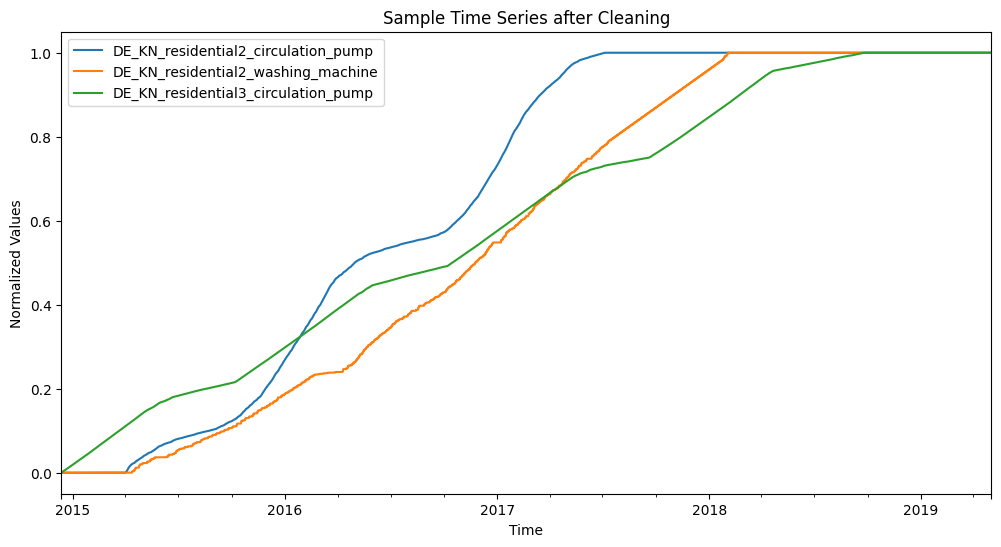

In [14]:
# Cell 10: Sanity check visualization
sample_cols = df.select_dtypes(include=np.number).columns[:3]
df[sample_cols].plot(figsize=(12,6), title="Sample Time Series after Cleaning")
plt.xlabel("Time")
plt.ylabel("Normalized Values")
plt.show()